#  Clustering Algorithms

Bu ödevde, UC Irvine Machine Learning Repository'den kalp hastalığı verisi ile çalışacaksınız.

- Veri seti kümeleme algoritmasına geçmeden önce bazı işlemlere ihtiyaç duymaktadır.

#Define the features and the outcome
  X = heartdisease_df.iloc[:, :13]
  y = heartdisease_df.iloc[:, 13]

 #Replace missing values (marked by ?) with a 0
  X = X.replace(to_replace='?', value=0)

 #Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
  y = np.where(y > 0, 0, 1)
- Burada, X sizin değişkenleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, hastanın kalp hastası olduğu ve y 0'a eşit olduğunda, hastanın kalp hastalığı olmadığı sonucuna varıyoruz.

Ödevi tamamlamak için aşağıdaki soruların cevabını içeren Jupyter notebook'u sisteme yükleyiniz:

**1. Üç farklı linkage yöntemini kullanarak kalp hastalığı veri kümesi için dendrogramlar üretin: “mean”, “complete” ve “ward”. Sizce hangi bağlantı yöntemi daha iyi sonuç vermektedir?**

**2. n_clusters = 2 ayarını yaparak kalp hastalığı verilerine yığınsal kümeleme uygulayın.** 

**3. Yukarıdaki üç bağlantı yöntemini deneyin ve her bir çözümünüz için ARI ve siluet skorları elde edin. Sonuçları 
birbirleriyle ve önceki bölümde uyguladığınız k-ortalama çözümü ile karşılaştırın.** 

**4. Hangi algoritma ve ayar daha iyi performans gösterir?**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


heartdisease_df = pd.read_csv('cleveland-0_vs_4.csv')

In [2]:
for i in ["ca", "thal", "num"]:
    print(f"{i} Column values:\n {heartdisease_df[i].unique()}\n")

ca Column values:
 ['0.0' '2.0' '1.0' '3.0' '<null>']

thal Column values:
 ['6.0' '3.0' '7.0' '<null>']

num Column values:
 ['negative' 'positive']



In [3]:
# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
heartdisease_df.num = heartdisease_df.num.replace('negative', 0)
heartdisease_df.num = heartdisease_df.num.replace('positive', 1)

In [4]:
print(heartdisease_df.loc[heartdisease_df['ca'] == '<null>'])
print(heartdisease_df.loc[heartdisease_df['thal'] == '<null>'])

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
85   52.0  1.0  3.0     138.0  223.0  0.0      0.0    169.0    0.0      0.0   
142  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
146  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope      ca thal  num  
85     1.0  <null>  3.0    0  
142    2.0  <null>  7.0    0  
146    1.0  <null>  3.0    0  
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
44  53.0  0.0  3.0     128.0  216.0  0.0      2.0    115.0    0.0      0.0   

    slope   ca    thal  num  
44    1.0  0.0  <null>    0  


In [5]:
heartdisease_df = heartdisease_df.drop([44,85,142,146])

In [6]:
heartdisease_df = heartdisease_df.dropna()
heartdisease_df.drop(heartdisease_df.tail(1).index,inplace=True)

In [7]:
heartdisease_df = heartdisease_df.reset_index(drop=True)

In [8]:
heartdisease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       172 non-null    float64
 1   sex       172 non-null    float64
 2   cp        172 non-null    float64
 3   trestbps  172 non-null    float64
 4   chol      172 non-null    float64
 5   fbs       172 non-null    float64
 6   restecg   172 non-null    float64
 7   thalach   172 non-null    float64
 8   exang     172 non-null    float64
 9   oldpeak   172 non-null    float64
 10  slope     172 non-null    float64
 11  ca        172 non-null    object 
 12  thal      172 non-null    object 
 13  num       172 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 18.9+ KB


In [16]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

1. Üç farklı linkage yöntemini kullanarak kalp hastalığı veri kümesi için dendrogramlar üretin: “mean”, “complete” ve “ward”. Sizce hangi bağlantı yöntemi daha iyi sonuç vermektedir?

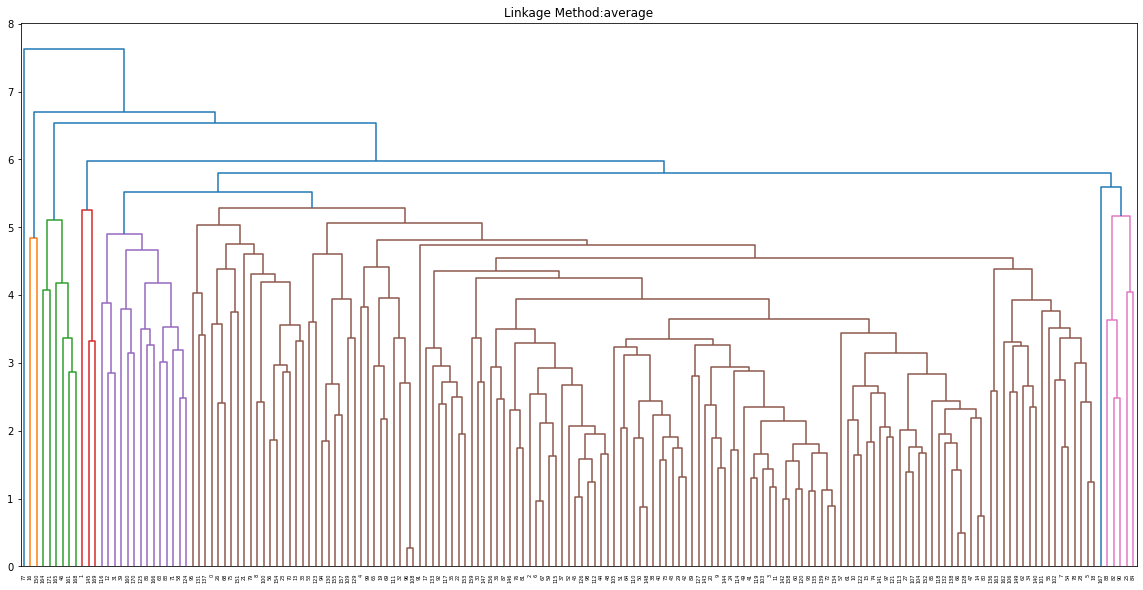

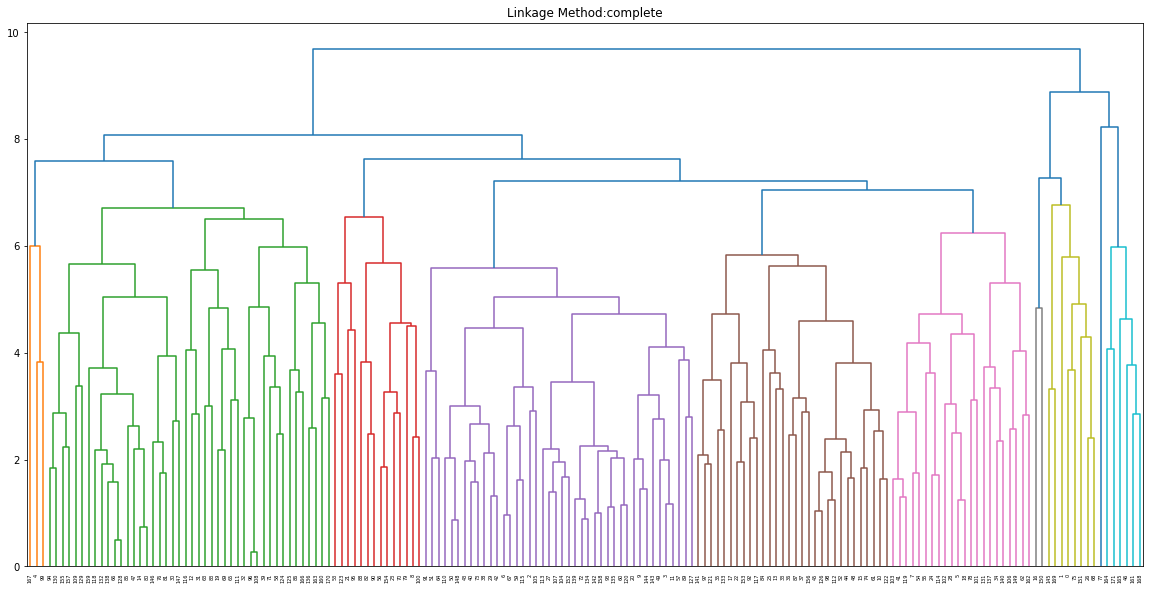

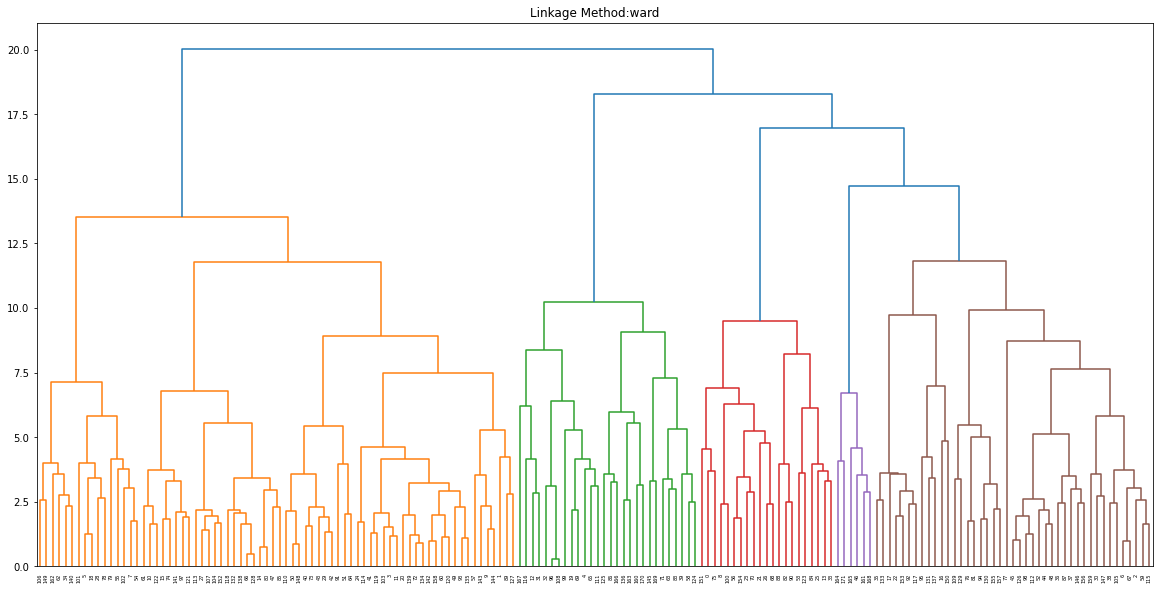

In [42]:
dentograms = ["average", "complete", "ward"]

for i in dentograms:
    plt.figure(figsize=(20,10))
    dendrogram(linkage(X_std, method=i))
    plt.title("Linkage Method:{}".format(i))
    plt.show()

Ward da daha az küme dağılımı gözükmektedir.

2. n_clusters = 2 ayarını yaparak kalp hastalığı verilerine yığınsal kümeleme uygulayın.

In [52]:
#Average
agg_küme1 = AgglomerativeClustering(linkage = 'average',
                                     affinity = 'cosine',
                                     n_clusters = 2)

kümeler1 = agg_kume1.fit_predict(X_std)

print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler1)))
print("Yığınsal Kümeleme Sonuçlarının silhoutte scoru: {}"
      .format(metrics.silhouette_score(X_std, kümeler1, metric='euclidean')))

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.040191675946474804
Yığınsal Kümeleme Sonuçlarının silhoutte scoru: 0.06879487871769711


In [54]:
#Compete
agg_küme2 = AgglomerativeClustering(linkage='complete',
                                    affinity='cosine',
                                    n_clusters=2)

kümeler2 = agg_küme2.fit_predict(X_std)

print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler2)))
print("Yığınsal Kümeleme Sonuçlarının silhoutte scoru: {}"
      .format(metrics.silhouette_score(X_std, kümeler2, metric='euclidean')))

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.07640391596464534
Yığınsal Kümeleme Sonuçlarının silhoutte scoru: 0.1138996778946806


In [58]:
#Ward
agg_küme3 = AgglomerativeClustering(linkage = 'ward',
                                    affinity = 'euclidean',
                                    n_clusters = 2)

kümeler3 = agg_küme3.fit_predict(X_std)

print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler3)))
print("Yığınsal Kümeleme Sonuçlarının silhoutte scoru: {}"
      .format(metrics.silhouette_score(X_std, kümeler3, metric='euclidean')))

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.015611606110825474
Yığınsal Kümeleme Sonuçlarının silhoutte scoru: 0.08018034153627603


Silhoutte değeri ve Ayarlanmış rand endeksi compete de maksimum değerinde.